In [5]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np; np.set_printoptions(linewidth=110);
import pandas as pd
# tell pandas to show all columns when we display a DataFrame
pd.set_option("display.max_columns", None)

# first we need a bit of import boilerplate
import os
import sys
from sys import platform
if platform == 'win32':
    sys.path.append('D:/Brain_Network/Code/')
    manifest_path = 'D:/Brain_Network/Data/Allen_Institute_Dataset/manifest.json'
    project_dir = 'D:/Brain_Network/'
elif platform =='darwin':
    sys.path.append('/Users/chenyu/Workspace/Brain_Network/Code/')
    manifest_path = '/Users/chenyu/Workspace/Brain_Network/Data/Allen_Institute_Dataset/manifest.json'
    project_dir = '/Users/chenyu/Workspace/Brain_Network/'
elif platform == 'linux':
    sys.path.append('/home/yuchen/workspace/Brain_Network/Code/')
    manifest_path = '/home/yuchen/workspace/Brain_Network/Data/Allen_Institute_Dataset/manifest.json'
    project_dir = '/home/yuchen/workspace/Brain_Network/'
else:
    print('Add new computer system settings.')

import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from tqdm.notebook import trange
import time
import itertools

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession

import data_visualizer
import data_model
import fine_time_coupling_model
import smoothing_spline
import util
import hierarchical_sampling_model
import hierarchical_model_generator
import jitter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data generator

In [2]:
generator = hierarchical_model_generator.HierarchicalModelGenerator()
data_dir = project_dir + 'Output/jitter/bivariate_coupling_data/'
trial_length = 5
trial_window = [0, trial_length]
num_trials = 200
beta = 30; beta_str = '30'  # ms
model_name = f'poisson_background_gaussian_mixture_square_full_model_beta{beta_str}ms_sigma100ms_trials{num_trials}_nonrepeated'

generator_par = {'num_trials': num_trials, 'trial_length': trial_length, 'trial_window': trial_window,
    'rho': 30, 'mu': 30, 'baseline': 10, 'window': 'gaussian', 'sigma': 0.1, 'random_seed': None,
    'type': 'square', 'alpha': [[0.5, -2.0], [2.0, 0.5]], 'beta': [[beta/1000, beta/1000], [beta/1000, beta/1000]], 'num_nodes': 2}
file_path = data_dir + model_name + '_generator_par.pkl'
util.save_variable(file_path, generator_par)

for itr in tqdm(range(50, 75), ncols=100, file=sys.stdout):
    generator_par['random_seed'] = itr
    spike_times = generator.generate_amarasingham_coupling_filter_spike_times_nonrepeated(generator_par, verbose=0)
    file_path = data_dir + model_name + f'_itr{itr}.pkl'
    util.save_variable(file_path, spike_times, verbose=False)

util.save_variable, save variable to:  D:/Brain_Network/Output/jitter/bivariate_coupling_data/poisson_background_gaussian_mixture_square_full_model_beta30ms_sigma100ms_trials200_nonrepeated_generator_par.pkl
100%|███████████████████████████████████████████████████████████████| 25/25 [13:09<00:00, 31.57s/it]


# Model fitting

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.58s/it]
optimal kernel width  150.0


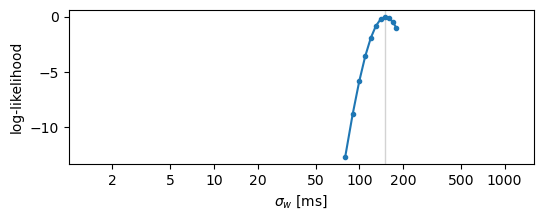

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
optimal kernel width  140.0


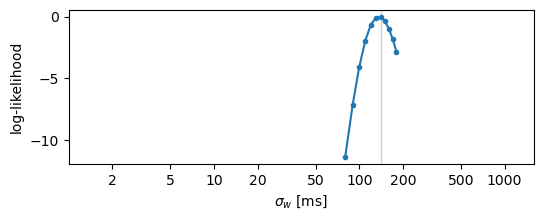

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.52s/it]
optimal kernel width  140.0


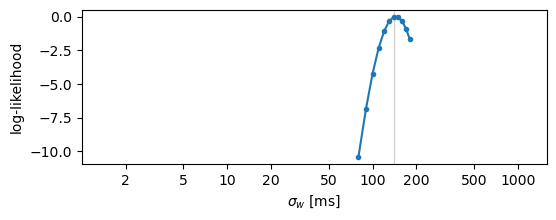

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  130.0


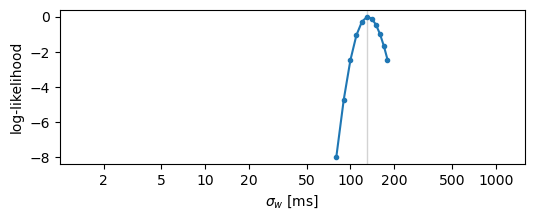

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.59s/it]
optimal kernel width  150.0


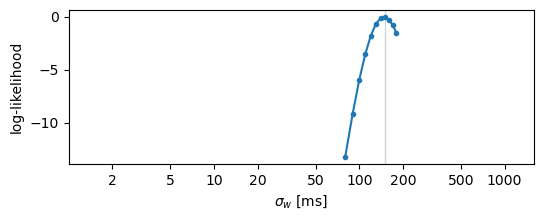

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.55s/it]
optimal kernel width  160.0


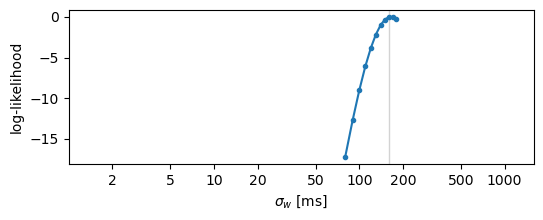

100%|███████████████████████████████████████████████████████████████| 11/11 [00:20<00:00,  1.85s/it]
optimal kernel width  140.0


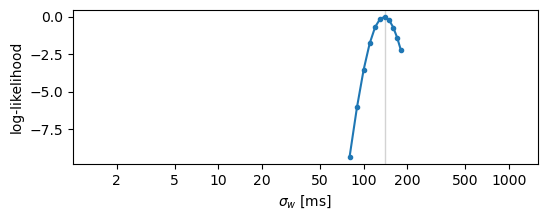

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.54s/it]
optimal kernel width  150.0


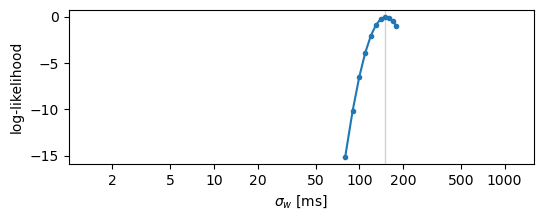

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.66s/it]
optimal kernel width  140.0


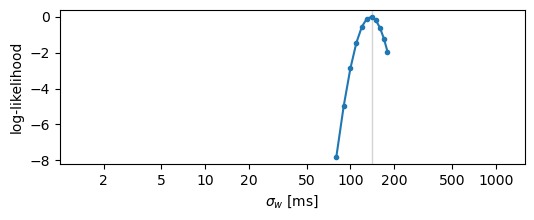

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.64s/it]
optimal kernel width  140.0


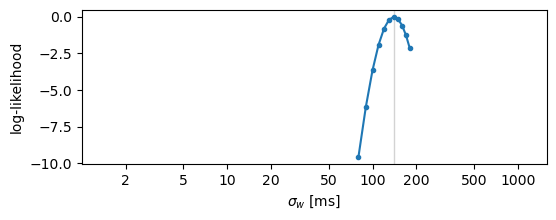

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.58s/it]
optimal kernel width  140.0


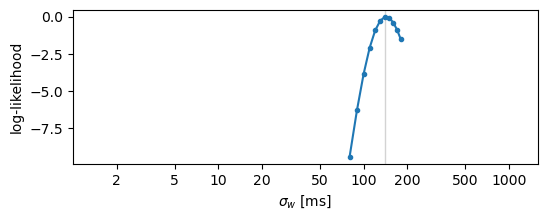

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  180.0


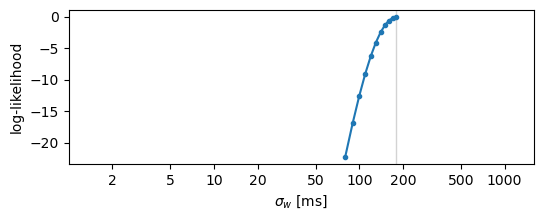

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.60s/it]
optimal kernel width  170.0


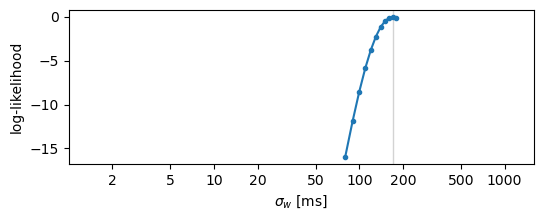

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.55s/it]
optimal kernel width  180.0


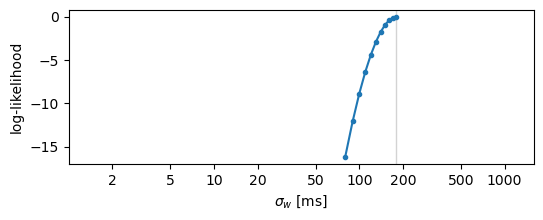

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
optimal kernel width  150.0


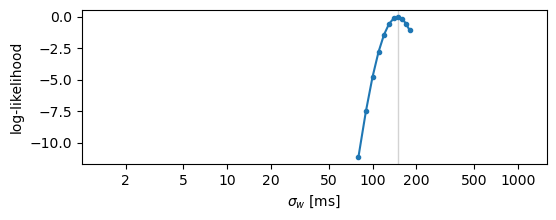

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.65s/it]
optimal kernel width  150.0


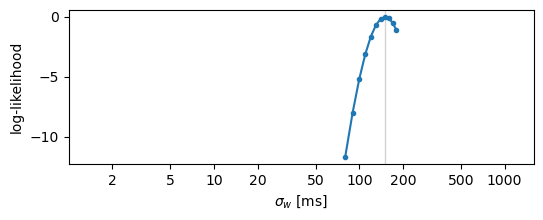

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.62s/it]
optimal kernel width  170.0


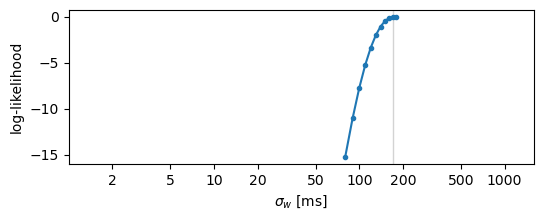

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.65s/it]
optimal kernel width  160.0


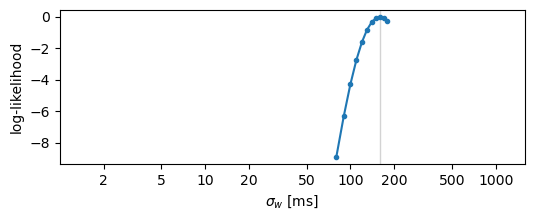

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.62s/it]
optimal kernel width  130.0


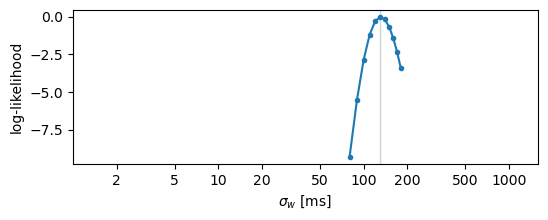

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
optimal kernel width  140.0


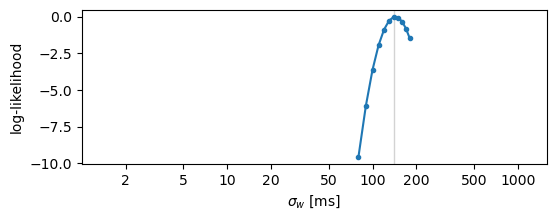

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.58s/it]
optimal kernel width  150.0


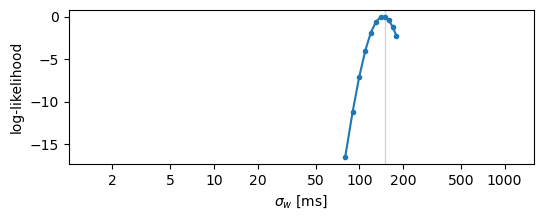

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  140.0


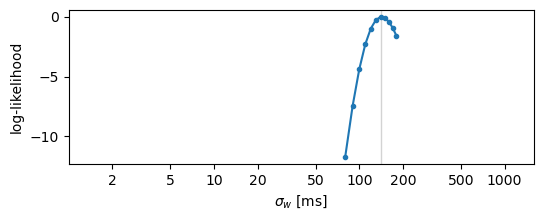

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.62s/it]
optimal kernel width  170.0


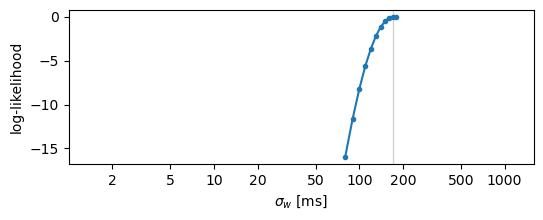

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.54s/it]
optimal kernel width  160.0


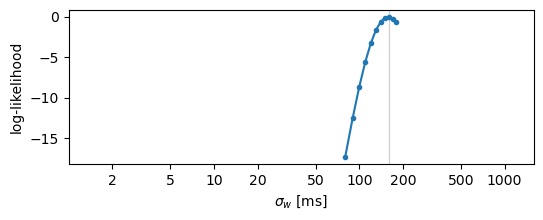

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.59s/it]
optimal kernel width  140.0


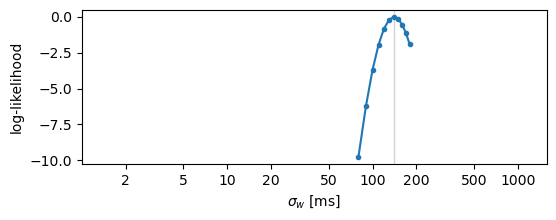

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
optimal kernel width  180.0


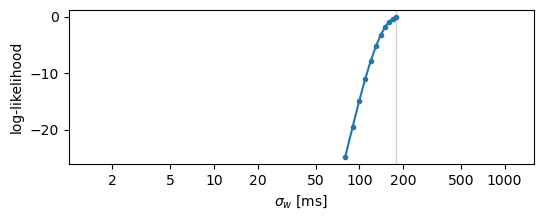

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.59s/it]
optimal kernel width  150.0


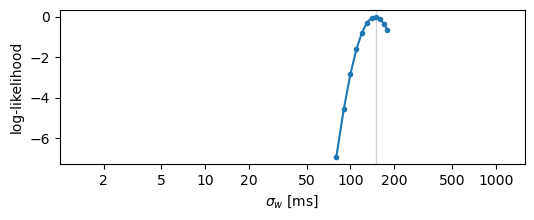

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  150.0


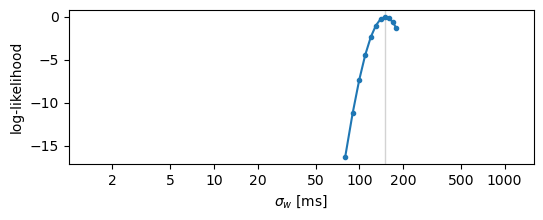

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.61s/it]
optimal kernel width  110.0


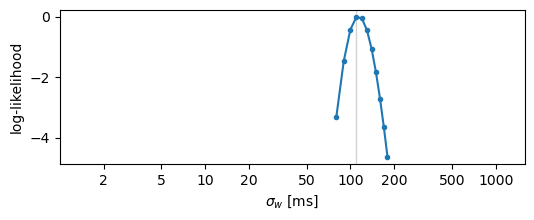

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
optimal kernel width  170.0


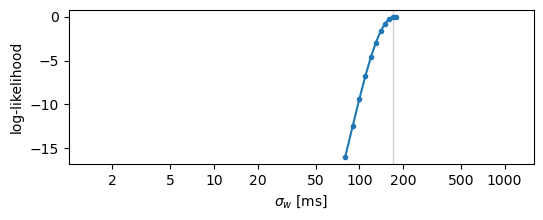

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.60s/it]
optimal kernel width  150.0


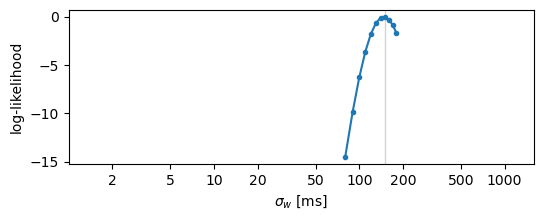

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.62s/it]
optimal kernel width  160.0


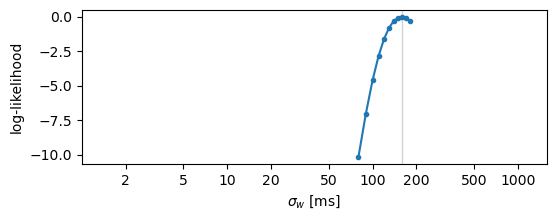

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.64s/it]
optimal kernel width  150.0


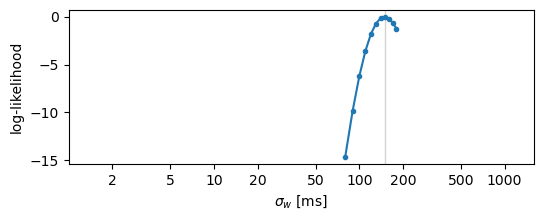

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  130.0


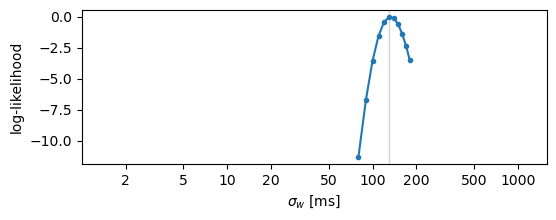

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
optimal kernel width  130.0


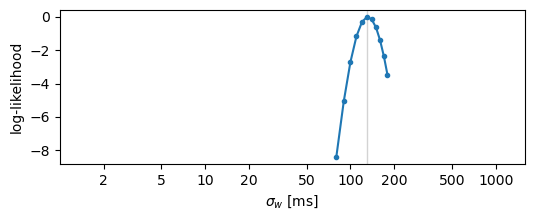

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.61s/it]
optimal kernel width  150.0


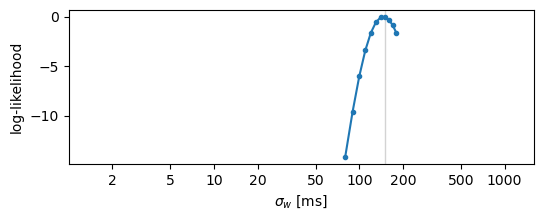

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.66s/it]
optimal kernel width  160.0


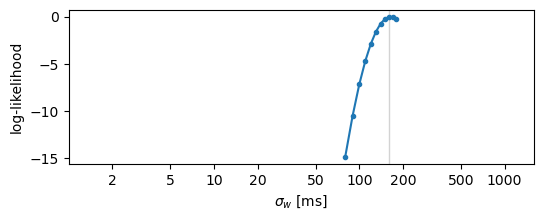

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.61s/it]
optimal kernel width  130.0


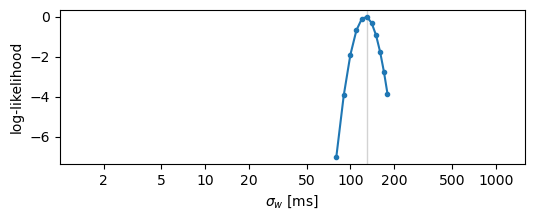

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.61s/it]
optimal kernel width  160.0


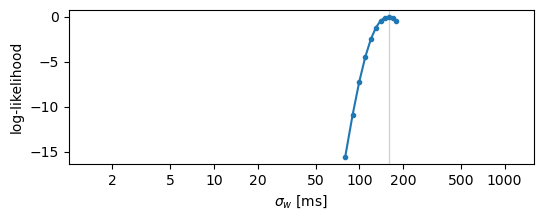

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
optimal kernel width  140.0


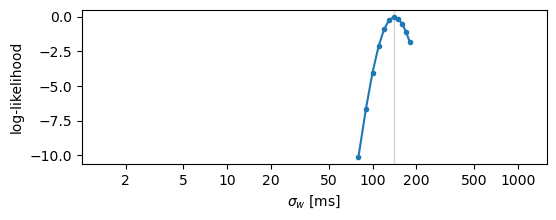

100%|███████████████████████████████████████████████████████████████| 11/11 [00:19<00:00,  1.75s/it]
optimal kernel width  120.0


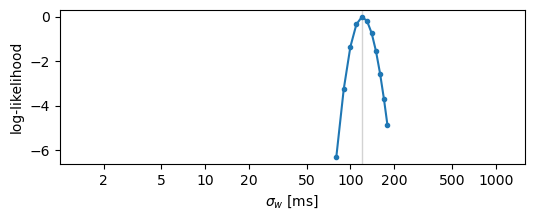

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.65s/it]
optimal kernel width  150.0


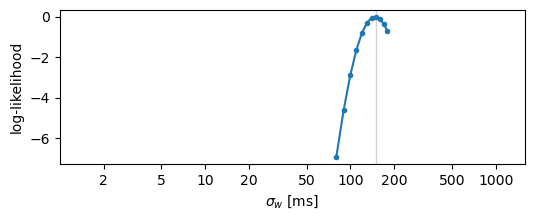

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.68s/it]
optimal kernel width  170.0


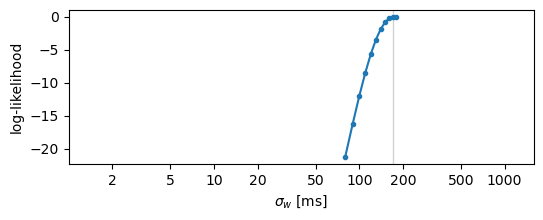

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.58s/it]
optimal kernel width  130.0


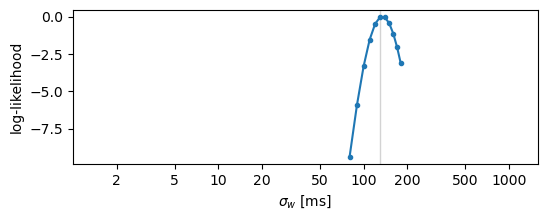

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.65s/it]
optimal kernel width  150.0


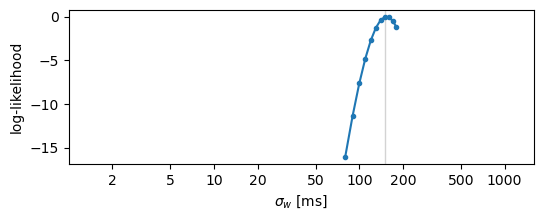

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
optimal kernel width  180.0


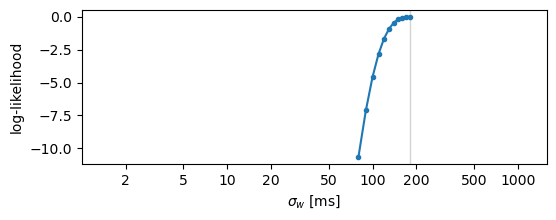

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.59s/it]
optimal kernel width  120.0


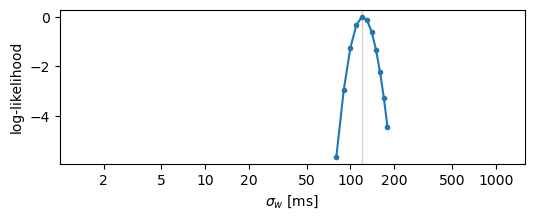

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
optimal kernel width  150.0


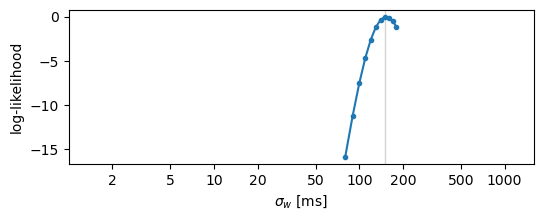

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
optimal kernel width  180.0


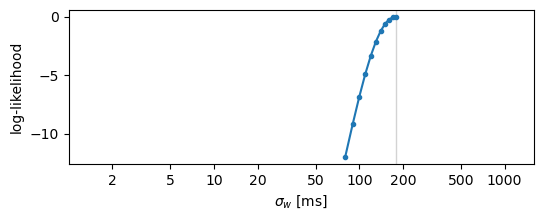

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
optimal kernel width  150.0


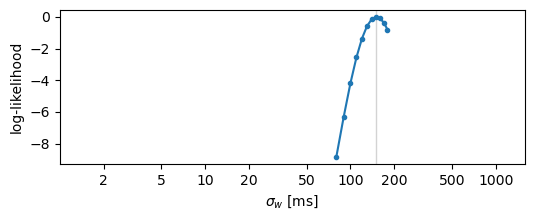

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.55s/it]
optimal kernel width  130.0


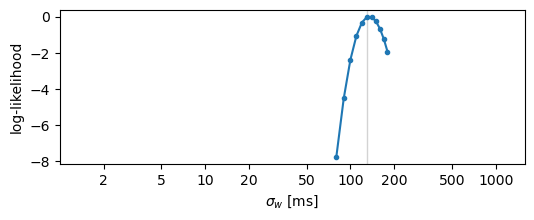

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.51s/it]
optimal kernel width  120.0


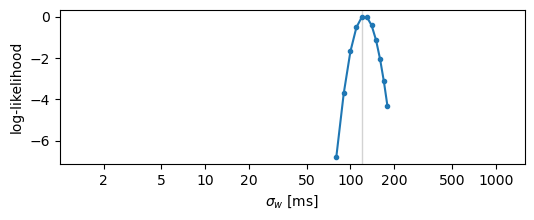

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  170.0


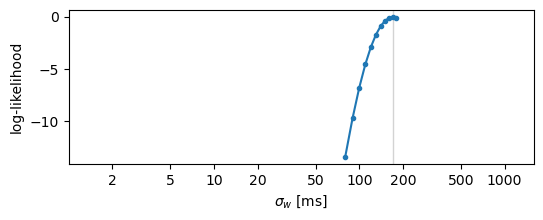

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.52s/it]
optimal kernel width  150.0


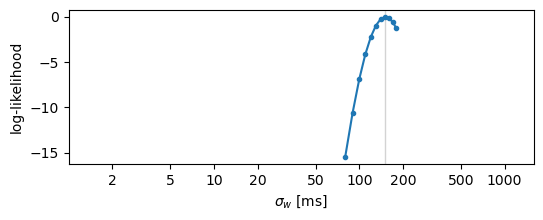

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.52s/it]
optimal kernel width  170.0


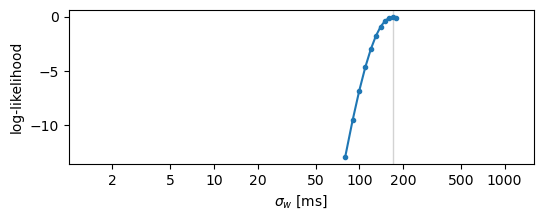

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
optimal kernel width  130.0


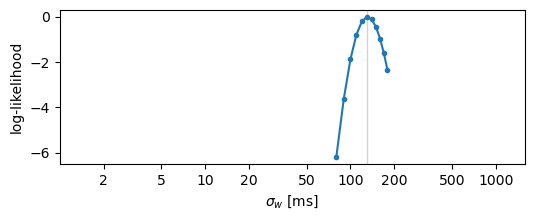

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.49s/it]
optimal kernel width  140.0


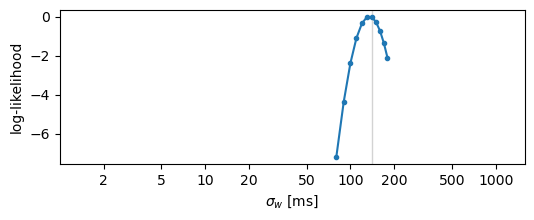

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.51s/it]
optimal kernel width  130.0


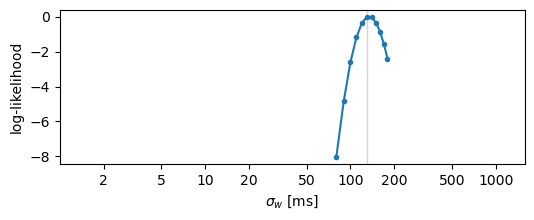

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.61s/it]
optimal kernel width  170.0


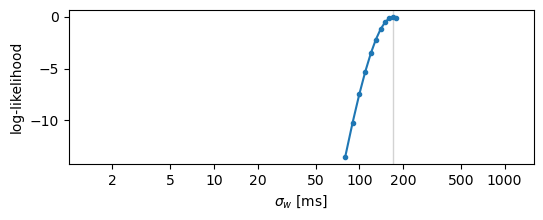

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.55s/it]
optimal kernel width  140.0


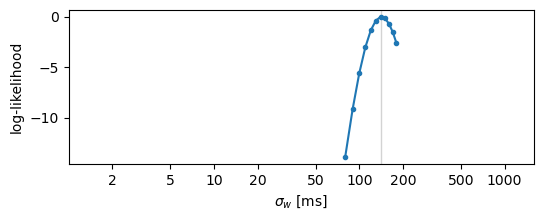

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.54s/it]
optimal kernel width  160.0


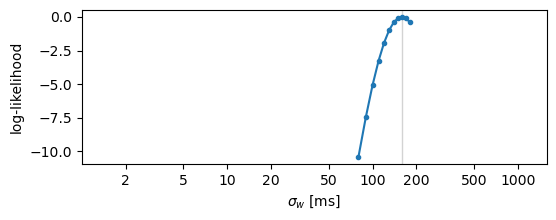

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.51s/it]
optimal kernel width  160.0


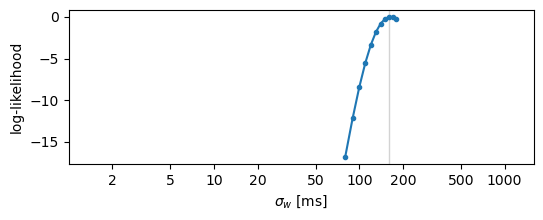

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
optimal kernel width  150.0


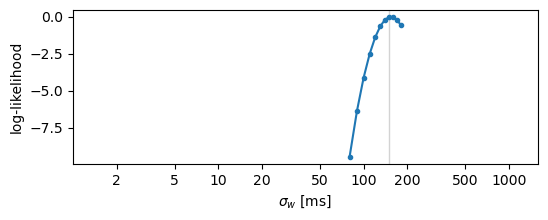

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  150.0


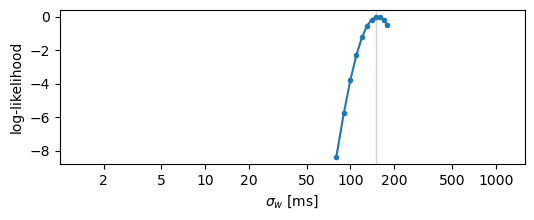

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.50s/it]
optimal kernel width  130.0


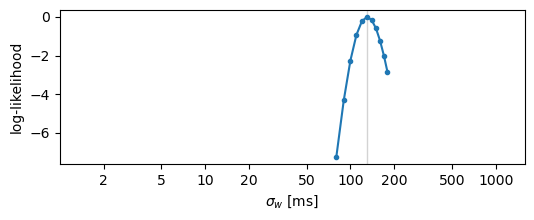

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.49s/it]
optimal kernel width  140.0


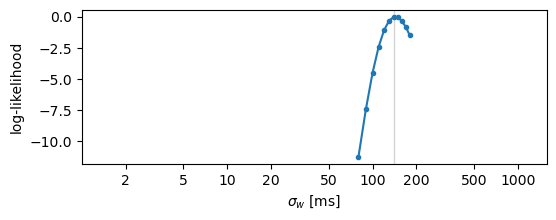

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  180.0


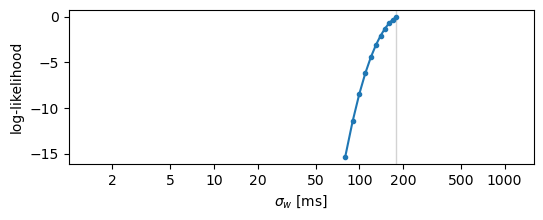

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.60s/it]
optimal kernel width  120.0


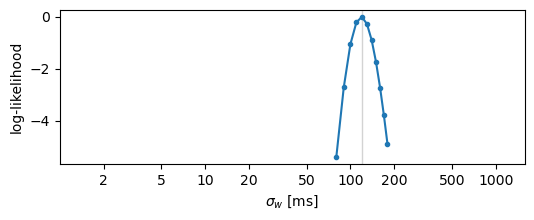

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.66s/it]
optimal kernel width  140.0


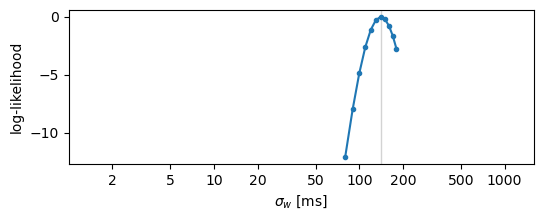

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.58s/it]
optimal kernel width  180.0


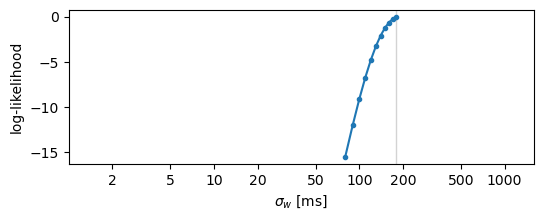

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
optimal kernel width  130.0


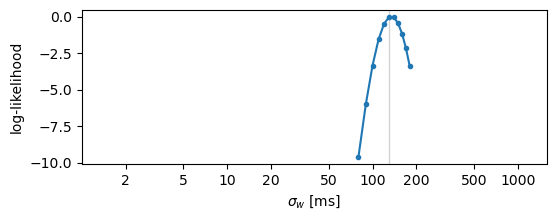

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.54s/it]
optimal kernel width  180.0


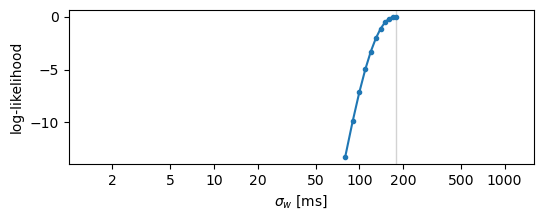

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.54s/it]
optimal kernel width  140.0


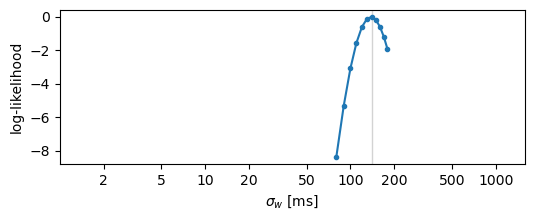

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.59s/it]
optimal kernel width  150.0


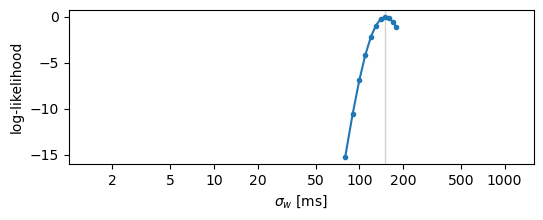

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.59s/it]
optimal kernel width  150.0


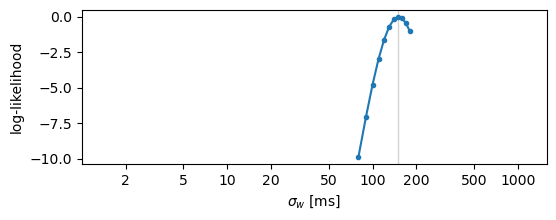

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.54s/it]
optimal kernel width  140.0


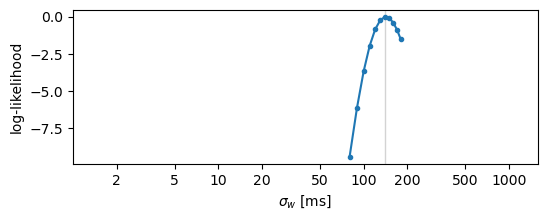

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.65s/it]
optimal kernel width  150.0


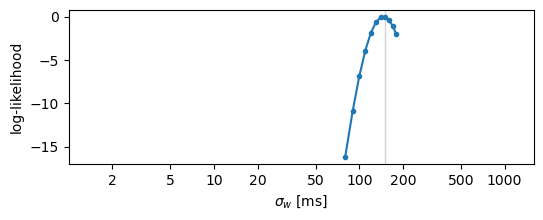

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.62s/it]
optimal kernel width  160.0


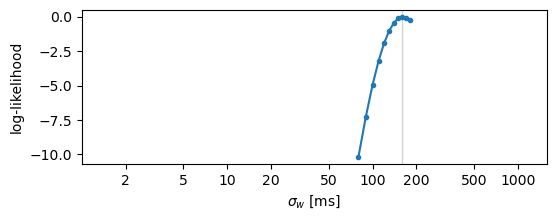

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
optimal kernel width  130.0


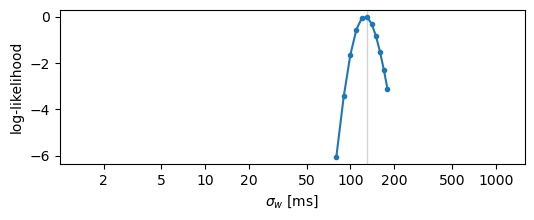

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]
optimal kernel width  140.0


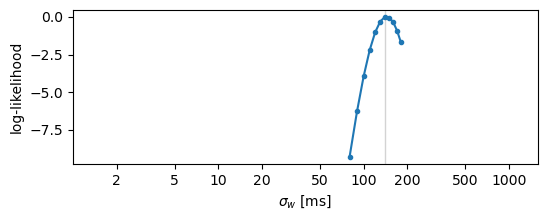

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.55s/it]
optimal kernel width  130.0


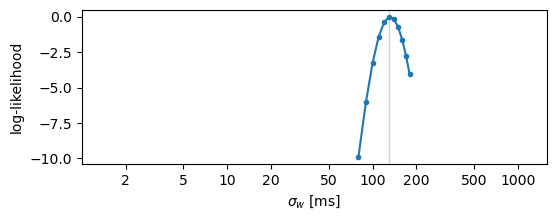

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.58s/it]
optimal kernel width  150.0


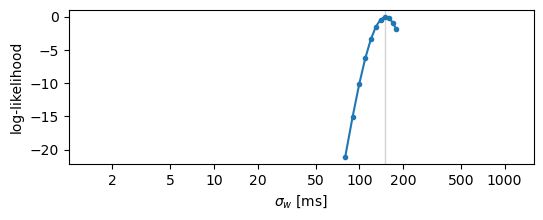

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.55s/it]
optimal kernel width  140.0


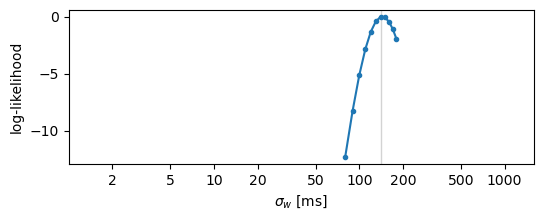

100%|███████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.64s/it]
optimal kernel width  180.0


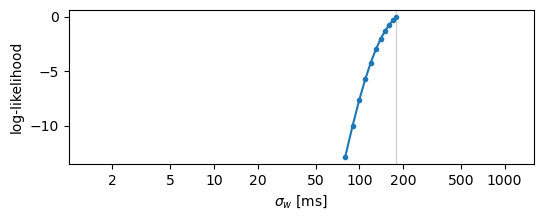

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.62s/it]
optimal kernel width  160.0


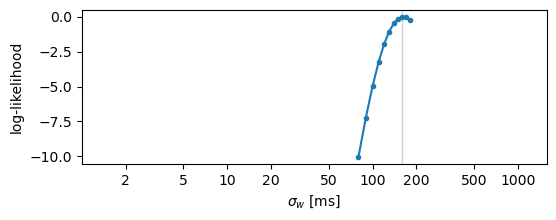

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
optimal kernel width  140.0


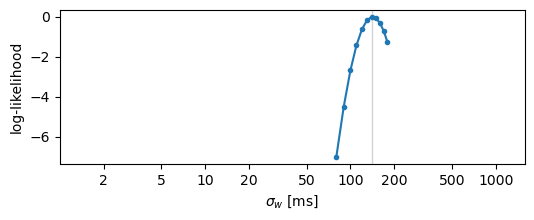

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.63s/it]
optimal kernel width  150.0


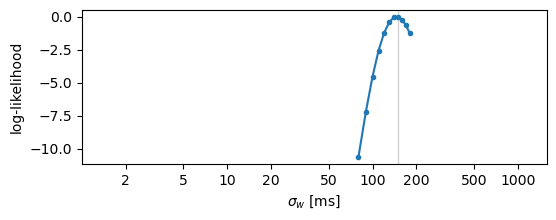

100%|███████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.55s/it]
optimal kernel width  180.0


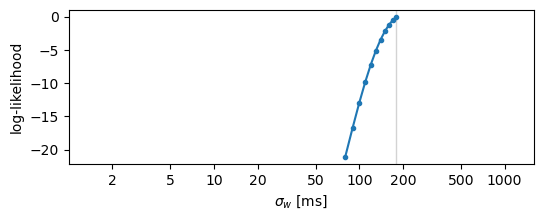

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.52s/it]
optimal kernel width  130.0


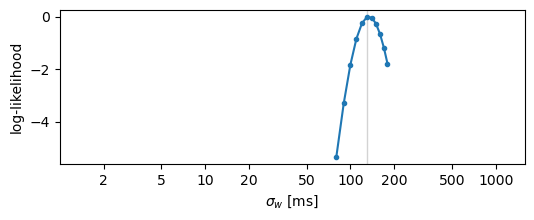

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.47s/it]
optimal kernel width  140.0


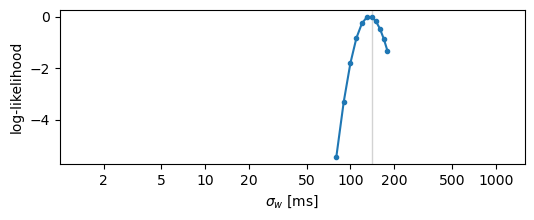

100%|███████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.45s/it]
optimal kernel width  120.0


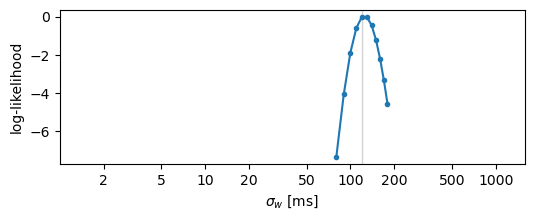

100%|███████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.43s/it]
optimal kernel width  150.0


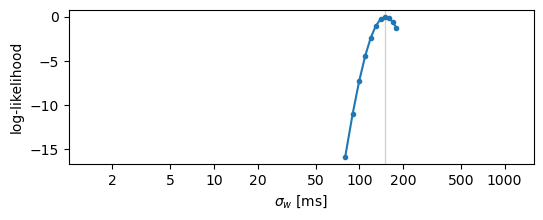

100%|███████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.43s/it]
optimal kernel width  150.0


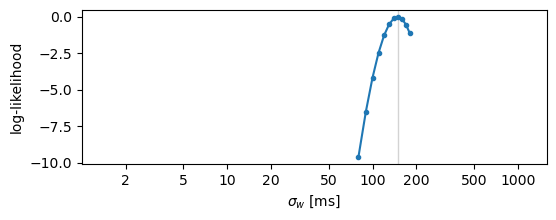

100%|███████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.40s/it]
optimal kernel width  160.0


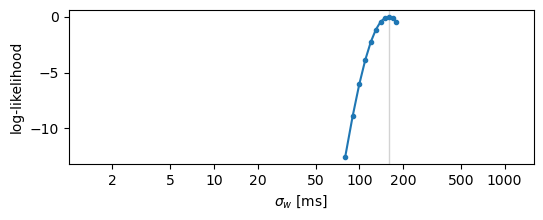

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.48s/it]
optimal kernel width  170.0


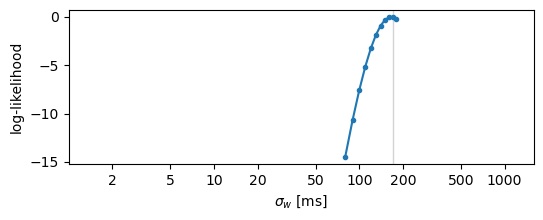

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.47s/it]
optimal kernel width  160.0


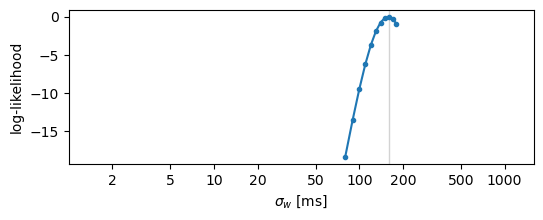

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.46s/it]
optimal kernel width  140.0


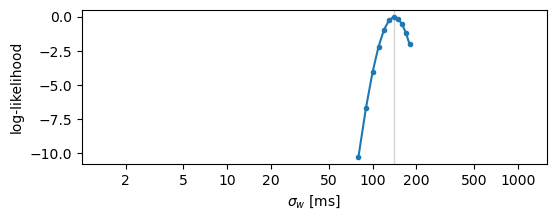

100%|███████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.44s/it]
optimal kernel width  150.0


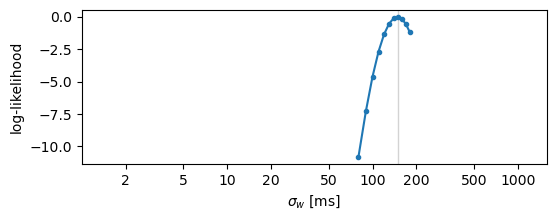

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.46s/it]
optimal kernel width  150.0


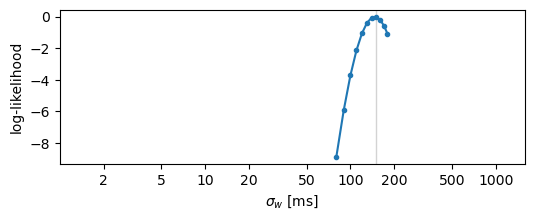

100%|███████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.51s/it]
optimal kernel width  140.0


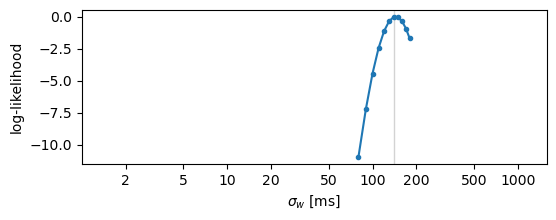

100%|█████████████████████████████████████████████████████████████| 100/100 [39:08<00:00, 23.49s/it]
util.save_variable, save variable to:  D:/Brain_Network/Output/jitter/bivariate_coupling_model/poisson_background_gaussian_mixture_point_process_likelihood_regression/poisson_background_gaussian_mixture_square_full_model_beta30ms_sigma100ms_trials200_nonrepeated_y2x_kernel140.0ms_model_par_list.pkl


In [6]:
# y --> x
jittertool = jitter.JitterTool()
data_dir = project_dir + 'Output/jitter/bivariate_coupling_data/'
model_dir = project_dir + 'Output/jitter/bivariate_coupling_model/poisson_background_gaussian_mixture_point_process_likelihood_regression/'

model_name = 'poisson_background_gaussian_mixture_square_full_model_beta30ms_sigma100ms_trials200_nonrepeated'

file_path = data_dir + f'{model_name}_generator_par.pkl'
generator_par = util.load_variable(file_path, verbose=False)
trial_length = generator_par['trial_length']
num_itrs = 100

model_par_list = []
trange = tqdm(range(num_itrs), ncols=100, file=sys.stdout)
for itr in trange:
    file_path = data_dir + f'{model_name}_itr{itr}.pkl'
    spike_times = util.load_variable(file_path, verbose=False)
    spike_times_x, spike_times_y = spike_times[1], spike_times[0]
    
    kernel_widths = np.arange(80, 190, 10) / 1000
    model_par = {'trial_window': trial_window, 'filter_type': 'square', 'filter_length': 0.03, 'self_filter_type': 'square', 'self_filter_length': 0.03, 
                 'append_nuisance': ['const', 'gaussian_kernel']}
    _,_,opt_kernel=jittertool.estimate_optimal_jitter_window_width_full_regression(spike_times_y[:50], spike_times_x[:50], model_par, kernel_width_grid=kernel_widths)
    
    model_par = {'filter_type': 'square', 'filter_length': 0.03, 'self_filter_type': 'square', 'self_filter_length': 0.03, 
                 'append_nuisance': ['const', 'gaussian_kernel'], 'kernel_width': opt_kernel,
                 'const_offset': 0, 'learning_rate': 0.5, 'max_num_itrs': 500, 'epsilon': 1e-5}

    model_par_hat = jittertool.bivariate_continuous_time_coupling_filter_full_regression(
            spike_times_y, spike_times_x, [0,trial_length], model_par)
    model_par_list.append(model_par_hat)

file_path = model_dir + f'{model_name}_y2x_model_par_list.pkl'
util.save_variable(file_path, model_par_list)